<a href="https://colab.research.google.com/github/Tonainings/VirgilioGit/blob/main/G2_BD2023_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cost Computation**

In [ ]:
import numpy as np
def sig(x):
 return 1/(1 + np.exp(-x))

def compute_multiple_cost(X, y, W, b):

  m = X.shape[0]
  cost = 0

  for i in range(m):
    z_i = np.dot(X[i],W) + b
    f_xi = sig(z_i)
    cost += -y[i]*np.log(f_xi) - (1-y[i])*np.log(1-f_xi)
  total_cost = (1/(2*m))*cost
  return total_cost

**Gradient Computation**

In [ ]:
def compute_multiple_gradient(X, y, W, b):

  m = X.shape[0] # Number of training samples
  n = X.shape[1] # Number of feature classes

  dj_dW = np.zeros(n)
  dj_db = 0

  for i in range(m): # For each sample
    z_i = np.dot(X[i],W) + b
    f_xi = sig(z_i) # Prediction
    err_i = f_xi - y[i] # Prediction - Ground truth
    for j in range(n): # For each feature
      x_ji = X[i,j]
      dj_dW[j] = dj_dW[j] + (1/m)*x_ji*err_i
    dj_db = dj_db + (1/m)*err_i
  return dj_dW, dj_db

**Multiple Gradient Descent**

In [ ]:
def multiple_gradient_descent(X, y,  W_in, b_in, alpha,  num_iters,  cost_function, gradient_function):

  W = W_in
  b = b_in

  for itt in range(num_iters):
    dj_dw, dj_db = compute_multiple_gradient(X, y, W, b)
    W = W - alpha*dj_dw
    b = b - alpha*dj_db
    cost = compute_multiple_cost(X, y, W, b)

    if itt % 100 == 0:
      print('Iteration {}: (w,b) = ({}, {}), cost = {}'.format(itt, W, b, cost))

  return W, b, cost

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read the dataset and find the weights**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Progetto/id_metadata.csv")

X = df[['danceability','energy']].values
df['valence_binary'] = (df['valence'] >= 0.5).astype(int)
Y = df['valence_binary'].values

alpha = 0.1
num_itt = 1000

W = np.array([5,5])
b = 5

multiple_gradient_descent(X, Y, W, b, alpha, num_itt, compute_multiple_cost, compute_multiple_gradient)

Iteration 0: (w,b) = ([4.97284775 4.96287803], 4.940856690697606), cost = 3.0577196449725013
Iteration 100: (w,b) = ([2.38407515 1.40836173], -0.6869660198127252), cost = 0.4944636617403289
Iteration 200: (w,b) = ([2.00036141 0.75758516], -1.8512423742498578), cost = 0.3020594243996198
Iteration 300: (w,b) = ([2.14535436 0.80770655], -1.9914338132358276), cost = 0.29987677319939793
Iteration 400: (w,b) = ([2.2918096  0.86541431], -2.111195344192932), cost = 0.2979207753962157
Iteration 500: (w,b) = ([2.43215178 0.92061035], -2.2256468293672316), cost = 0.29612879941287473
Iteration 600: (w,b) = ([2.56661534 0.97335492], -2.335321315702988), cost = 0.2944843546346313
Iteration 700: (w,b) = ([2.69552601 1.02383319], -2.4405140742246094), cost = 0.2929728738555272
Iteration 800: (w,b) = ([2.81918986 1.0722122 ], -2.541493376746508), cost = 0.2915814593346139
Iteration 900: (w,b) = ([2.93789291 1.1186412 ], -2.6385058334567777), cost = 0.2902986701259451


(array([3.05078469, 1.16281631]), -2.7308635711616778, 0.28912572456232694)

the shape of the inputs x is: (49999, 2)
the shape of the inputs y is: (49999,)

the shape of the training set (input) is: (29999, 2)
the shape of the training set (target) is: (29999,)

the shape of the cross validation set (input) is: (10000, 2)
the shape of the cross validation set (target) is: (10000,)

the shape of the test set (input) is: (10000, 2)
the shape of the test set (target) is: (10000,)

Number of 1s in the test set: 4084
Number of 0s in the test set: 5916
best parameters are: {'C': 1, 'penalty': 'l2'}

Accuracy of the model: 72.23%


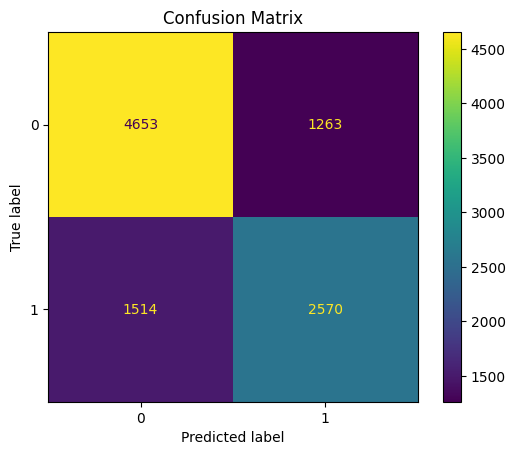

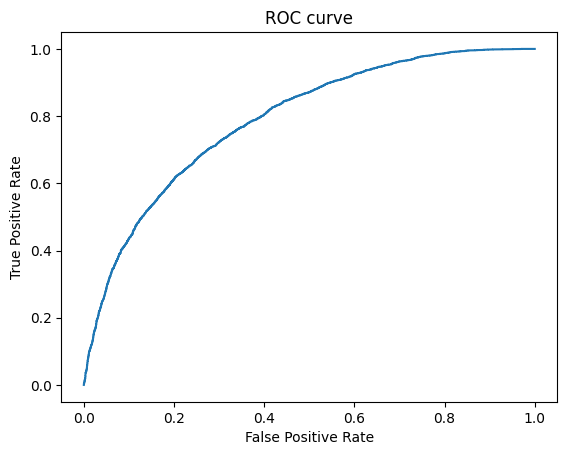

Computed mean of the training set: 0.28
Computed standard deviation of the training set: 0.53


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf

# Loading the data
df = pd.read_csv("/content/drive/MyDrive/Progetto/id_metadata.csv")
X = df[['danceability', 'energy']].values
df['valence_binary'] = (df['valence'] >= 0.5).astype(int)
y = df['valence_binary'].values

print(f"the shape of the inputs x is: {X.shape}")
print(f"the shape of the inputs y is: {y.shape}\n")

# Splitting the data into training and testing sets
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=1)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)
del X_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}\n")

# Counting the number of 1s and 0s in the test set
num_ones = sum(y_test == 1)
num_zeros = sum(y_test == 0)

print("Number of 1s in the test set:", num_ones)
print("Number of 0s in the test set:", num_zeros)

# Define the hyperparameters and their possible values to search
parameters = {'C': [0.1, 1, 10], 'penalty': ['l2']}

# Create an instance of the logistic regression model
logistic_model = LogisticRegression(solver='lbfgs')

# Create an instance of the GridSearchCV class and fit it on the cross-validation data
grid_search = GridSearchCV(logistic_model, parameters, cv=5)
grid_search.fit(X_cv, y_cv)

# Retrieve the best hyperparameters and retrain the model
best_params = grid_search.best_params_
logistic_model = LogisticRegression(**best_params, solver='lbfgs')
logistic_model.fit(X_train, y_train)

print(f"best parameters are: {best_params}\n")

# Predict the results on the test set
y_pred = logistic_model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of the model: {:.2f}%".format(accuracy*100))

# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix
cmd = ConfusionMatrixDisplay(cm, display_labels=logistic_model.classes_)
cmd.plot()
plt.title("Confusion Matrix")
plt.show()

# Plotting the ROC curve
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
std_dev = np.std(y_test - y_pred)

print("Computed mean of the training set: {:.2f}".format(mse))
print("Computed standard deviation of the training set: {:.2f}".format(std_dev))